In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
np.set_printoptions(precision=6)

In [4]:
class OpenQN:
    def __init__(self, L, k, lambda0, mu, Theta, omega):
        self.L = L
        self.k = k
        self.lambda0 = lambda0
        self.mu = mu
        self.Theta = Theta
        self.omega = omega
        
        self.list_n = []
        self.list_tau = []
        self.list_lambda0 = []
        self.list_mu4 = []
    
    
    def make_calculations(self):
        self.get_stationary_vector()
        print()
        
        lambdas = np.zeros(self.L)
        for i in range(1, len(self.omega)):
            lambdas[i - 1] = self.lambda0 * self.omega[i] / self.omega[0]
        print('lambda0 =', self.lambda0,'|', 'lambdas:', lambdas)
        print()
        
        psy = np.zeros(self.L)
        for i in range(self.L):
            psy[i] = lambdas[i] / (self.k[i] * self.mu[i])
        print('psy:', psy)
        print()
        
        P0 = [0] * self.L
        b = [0] * self.L
        h = [0] * self.L
        n = [0] * self.L
        u = [0] * self.L
        sum_for_tau = 0

        for i in range(len(P0)):
            summa = 0
            for j in range(self.k[i]):
                summa += (self.k[i] * psy[i])**j / factorial(j)
            P0[i] = ( ( ((self.k[i] * psy[i])**self.k[i]) / (factorial(self.k[i]) * (1 - psy[i])) ) + summa)**(-1)
            b[i] = P0[i] * (((self.k[i]**self.k[i]) * (psy[i]**(self.k[i] + 1))) / (factorial(self.k[i]) * ((1 - psy[i])**2)))
            h[i] = psy[i] * self.k[i]
            n[i] = b[i] + h[i]
            u[i] = n[i] / lambdas[i]
            sum_for_tau += lambdas[i] * u[i]

        tau = (1 / self.lambda0) * sum_for_tau
        
        self.record(self.lambda0, self.mu[3], tau, n)
        
        print("М.о. числа требований в сиситемах:\n", n)
        print()
        print("М.о. длительности пребывания требований в сети:", tau)
        print()
        print('*' * 70)
        
    def get_stationary_vector(self):
        while any(self.omega.dot(self.Theta) != self.omega):
            self.omega = self.omega.dot(self.Theta)
        return self.omega

    def record(self, lambda0, mu4, tau, n):
        self.list_lambda0.append(lambda0)
        self.list_mu4.append(mu4)
        self.list_tau.append(tau)
        self.list_n.append(n)
        
    def show_for_lambda0(self):
        plt.plot(self.list_lambda0, self.list_tau)
        plt.title('Зависимость м.о. длительности пребывания требований в сети от интенсивности входного потока')
        plt.xlabel('lambda0')
        plt.ylabel('tau')
        plt.grid()
        plt.show()
            
        for i in range(self.L):
            plt.plot(self.list_lambda0, [n[i] for n in self.list_n], 'r')
            plt.title(f'Зависимость м.о. числа требований в системе {i + 1} от интенсивности входного потока')
            plt.xlabel('lambda0')
            plt.ylabel('n')
            plt.grid()
            plt.show()
            
    def show_for_mu4(self):
        plt.plot(self.list_mu4, self.list_tau)
        plt.title('Зависимость м.о. длительности пребывания требований в сети от интенсивности обслуживания mu4')
        plt.xlabel('mu4')
        plt.ylabel('tau')
        plt.grid()
        plt.show()
        
        plt.plot(self.list_mu4, [n[3] for n in self.list_n], "g")
        plt.title(f"Зависимость м.о.числа требования в системе 4 от интенсивности обслуживания mu4")
        plt.xlabel("mu4")
        plt.ylabel("n")
        plt.grid()
        plt.show()
            
    def reset(self):
        self.list_lambda0.clear()
        self.list_mu4.clear()
        self.list_tau.clear()
        self.list_n.clear()
            
    def set_mu4(self, mu):
        self.mu[3] = m


Stationary vector: [0.144791 0.057916 0.040542 0.134194 0.047319 0.281474 0.096733 0.197032]
Check stationary vector sum: 1.0

lambda0 = 0.1 | lambdas: [0.04     0.028    0.092681 0.032681 0.1944   0.066809 0.13608 ]

psy: [0.057143 0.035    0.077234 0.032681 0.176727 0.074232 0.09072 ]

М.о. числа требований в сиситемах:
 [0.06060606060606062, 0.036269430051813475, 0.08369840903850588, 0.03378497272567307, 0.21466431095406363, 0.08018386108273749, 0.09977124758050326]

М.о. длительности пребывания требований в сети: 6.089782920393574

**********************************************************************

lambda0 = 0.11 | lambdas: [0.044    0.0308   0.101949 0.035949 0.21384  0.073489 0.149688]

psy: [0.062857 0.0385   0.084957 0.035949 0.1944   0.081655 0.099792]

М.о. числа требований в сиситемах:
 [0.06707317073170732, 0.04004160166406657, 0.09284535075685353, 0.03728945231116918, 0.24131082423038727, 0.08891520362456881, 0.11085438032099247]

М.о. длительности пребывания требовани

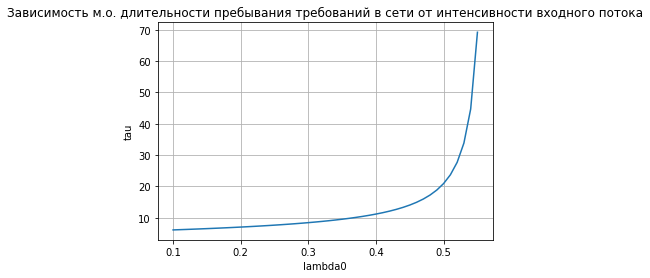

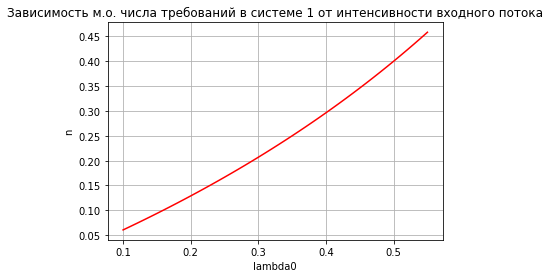

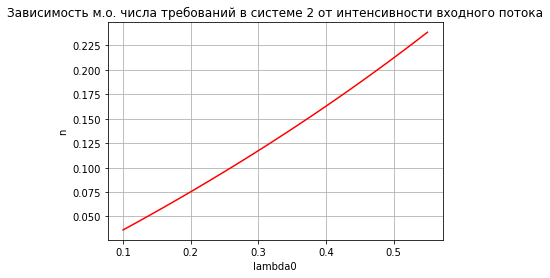

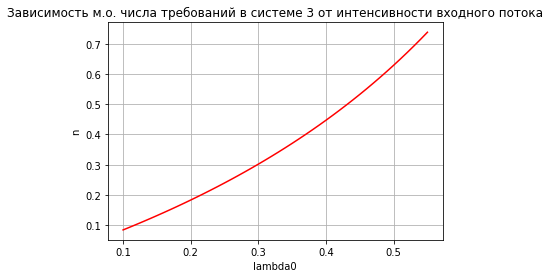

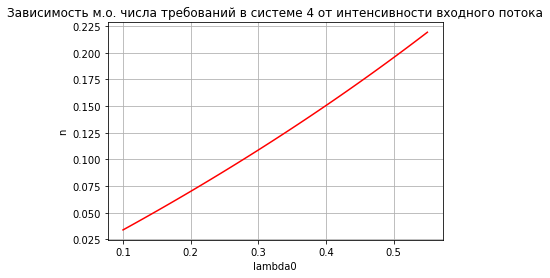

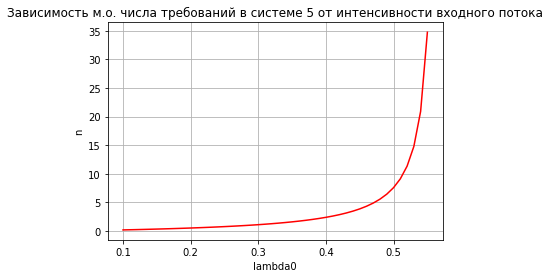

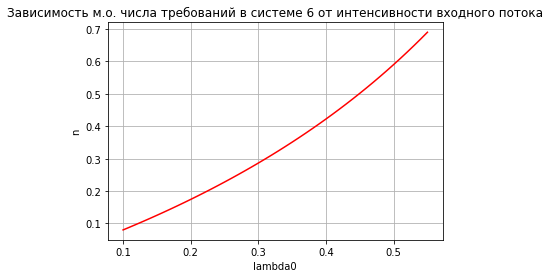

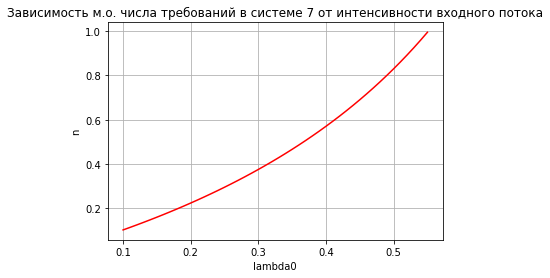


lambda0 = 0.4 | lambdas: [0.16     0.112    0.370723 0.130723 0.7776   0.267234 0.54432 ]

psy: [0.228571 0.14     0.308936 0.217872 0.706909 0.296927 0.36288 ]

М.о. числа требований в сиситемах:
 [0.2962962962962964, 0.16279069767441862, 0.4470443349753695, 0.27856365614798706, 2.411910669975186, 0.42232683254875597, 0.5695630336514316]

М.о. длительности пребывания требований в сети: 11.471238803173613

**********************************************************************

lambda0 = 0.4 | lambdas: [0.16     0.112    0.370723 0.130723 0.7776   0.267234 0.54432 ]

psy: [0.228571 0.14     0.308936 0.137604 0.706909 0.296927 0.36288 ]

М.о. числа требований в сиситемах:
 [0.2962962962962964, 0.16279069767441862, 0.4470443349753695, 0.15955954916116974, 2.411910669975186, 0.42232683254875597, 0.5695630336514316]

М.о. длительности пребывания требований в сети: 11.17372853570657

**********************************************************************

lambda0 = 0.4 | lambdas: [0.16     0

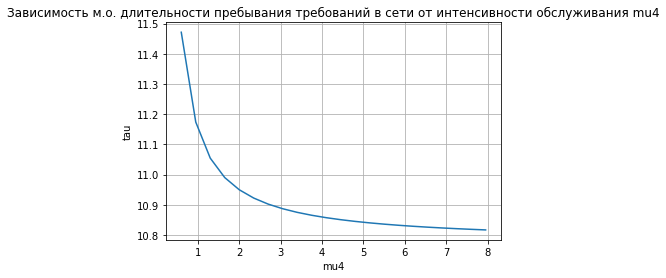

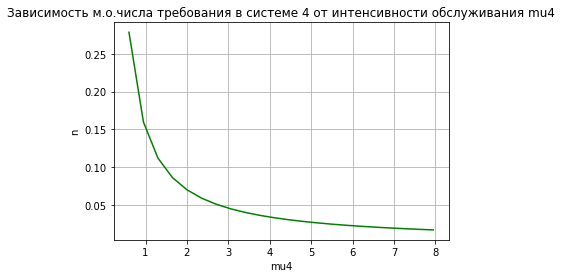

In [5]:
L = 7
k = np.array([1, 1, 1, 1, 1, 1, 1])
lambda0 = 0.4
mu = np.array([0.7, 0.8, 1.2, 1, 1.1, 0.9, 1.5])

Theta = np.array([
    [0, 0.4, 0, 0.6, 0, 0, 0, 0],
    [0, 0, 0.7, 0, 0.3, 0, 0, 0],
    [0.1, 0, 0, 0, 0.5, 0, 0.4, 0],
    [0, 0, 0, 0, 0, 0, 0.6, 0.4],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0.5, 0, 0, 0, 0, 0.3, 0, 0.2],
    [0, 0, 0, 0, 0.1, 0, 0, 0.9],
    [0, 0, 0, 0, 0, 1, 0, 0]
])

omega = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

network = OpenQN(L, k, lambda0, mu, Theta, omega)
print('Stationary vector:', network.get_stationary_vector())
print('Check stationary vector sum:', sum(network.get_stationary_vector()))

lambdas0 = [l for l in np.arange(0.1, 0.55, 0.01)]

mu4 = [m for m in np.arange(0.6, 8, 0.35)]

for l in lambdas0:
    network.lambda0 = l
    network.make_calculations()
    
network.show_for_lambda0()

network.reset()

network.lambda0 = lambda0

for m in mu4:
    network.set_mu4(m)
    network.make_calculations()
    
network.show_for_mu4()

